In [1]:
import datajoint as dj
from nbd.annotation_schema import DatasetImage,CroppedDatasetImage,schema
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

[2025-04-23 04:03:05,216][INFO]: DataJoint 0.14.4 connected to root@localhost:3306


In [2]:
def load_dataset_image(path):
    import cv2
    image = cv2.imread(path,cv2.IMREAD_UNCHANGED)

    eye_path = path.replace('.pgm','.eye')
    y = pd.read_csv(eye_path,sep='\t').to_numpy()
    return image, y

In [3]:
flist = glob('/root/NBD-24/dataset/faces_annotated/*.pgm')
for file in flist:
    print(file)
    x,y = load_dataset_image(file)
    DatasetImage.insert1(dict(image=x,y=y,fname=file),skip_duplicates=True)

/root/NBD-24/dataset/faces_annotated/BioID_1337.pgm
/root/NBD-24/dataset/faces_annotated/BioID_1317.pgm
/root/NBD-24/dataset/faces_annotated/BioID_1215.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0631.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0121.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0648.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0759.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0594.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0516.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0739.pgm
/root/NBD-24/dataset/faces_annotated/BioID_1341.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0729.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0204.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0529.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0532.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0934.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0041.pgm
/root/NBD-24/dataset/faces_annotated/BioID_0700.pgm
/root/NBD-24/dataset/faces_annotated/BioID_1252.pgm
/root/NBD-24

In [4]:
CroppedDatasetImage.populate(suppress_errors=True)

[2025-04-23 04:03:42,253][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:42,327][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:42,488][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:43,037][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:43,100][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:43,158][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:43,213][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:44,300][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:45,852][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:45,913][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:46,168][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:46,831][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:46,886][ERROR]: 'NoneType' object is not subscriptable
[2025-04-23 04:03:48,134][ERROR]: 'NoneType' object

{'success_count': 1458,
 'error_list': [({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0053.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0054.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0055.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0058.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0059.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0060.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0061.pgm'},
   "TypeError: 'NoneType' object is not subscriptable"),
  ({'fname': '/root/NBD-24/dataset/faces_annotated/BioID_0072.pgm'},
   "TypeErr

# Unannotated

In [21]:
filez = glob('/root/NBD-24/dataset/faces_unannotated/*')
from PIL import Image
from nbd.annotation_schema import UnannotatedImage,CroppedImage

In [22]:
already = UnannotatedImage.fetch('fname')
for file in filez:
    if file not in already:
        print('file')
        im = Image.open(file)
        im = np.array(im)
        UnannotatedImage.insert1(dict(image=im,fname=file),skip_duplicates=True)


file
file
file
file
file
file
file
file
file
file
file


In [23]:
CroppedImage.populate(suppress_errors=True,display_progress=True)

CroppedImage:   0%|          | 0/13 [00:00<?, ?it/s][2025-04-23 04:30:57,258][ERROR]: cannot unpack non-iterable NoneType object
[2025-04-23 04:30:57,387][ERROR]: cannot unpack non-iterable NoneType object
CroppedImage: 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


{'success_count': 11,
 'error_list': [({'fname': '/root/NBD-24/dataset/faces_unannotated/002.JPG'},
   'TypeError: cannot unpack non-iterable NoneType object'),
  ({'fname': '/root/NBD-24/dataset/faces_unannotated/dy4XJazj_400x400.jpg'},
   'TypeError: cannot unpack non-iterable NoneType object')]}

In [20]:
len(CroppedImage())

9

In [70]:
i=0

In [89]:
(CroppedImage & CroppedImage.fetch("KEY")[i]).show()
i+=1

IndexError: list index out of range

In [55]:
import os
i-=1
key = CroppedImage.fetch("KEY")[i]
fname = (CroppedImage & key).fetch1('fname')
print(fname)
os.remove((UnannotatedImage & key).fetch1('fname'))
(UnannotatedImage & key).delete()

faces_unannotated/Screenshot 2023-08-29 at 4.15.10 PM.png


[2024-04-03 01:35:15,369][INFO]: Deleting 1 rows from `nbd`.`__cropped_image`
[2024-04-03 01:35:15,891][INFO]: Deleting 1 rows from `nbd`.`unannotated_image`
[2024-04-03 01:35:17,059][INFO]: Deletes committed.


1

IndexError: list index out of range

In [12]:
im = Image.open(filez[0])

In [18]:
np.array(im).shape

(1687, 3000, 3)

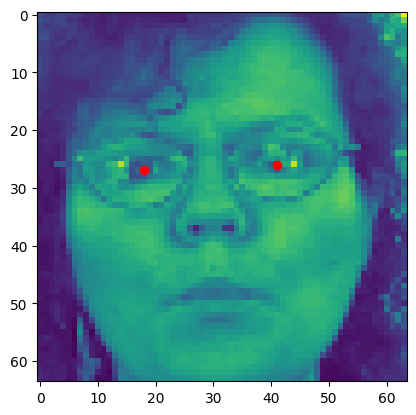

In [61]:
plt.figure()
plt.imshow(resized)
plt.scatter(new_y.reshape(-1,2)[:,0], new_y.reshape(-1,2)[:,1], c='r')

In [38]:
face_coords = np.array([123, 61, 270, 208], dtype=np.int32)
y = np.array([[228, 116, 166, 118]], dtype=np.int32)

transformed_y = transform_points(face_coords, y)
print("Transformed Points:", transformed_y)

ValueError: operands could not be broadcast together with shapes (1,4) (2,) 

In [34]:
y

array([[228, 116, 166, 118]])

In [31]:
y.shape

(1, 4)

In [28]:
# Example usage
face_coords = [100, 50, 300, 250]  # Example face bounding box in the original image
y = [150, 100, 250, 200]  # Example points within the face bounding box
original_size = (500, 400)  # Original image size (height, width)

transformed_y = transform_points(face_coords, y, original_size)
print("Transformed Points:", transformed_y)

Transformed Points: [16.0, 16.0, 48.0, 48.0]


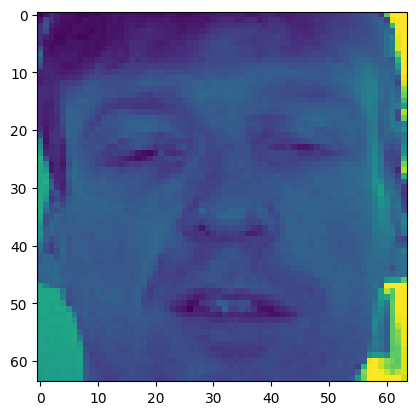

In [25]:
plt.figure()
plt.imshow(resized)